In [1]:
import ptc_twiss.madx_configuration as twiss_conf
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_twiss.particles_trajectory_generator as twiss_ptg
import ptc_track.madx_configuration as track_conf
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import ptc_track.particles_trajectory_generator as track_ptg
import visualization.optics_parameter_visualisation as plotter
import approximator.runner as app_runner
import approximator.optics_parameters as app_op
import approximator.matrix_indexes as app_indexes
import approximator.particles_trajectory_generator as app_ptg
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns
import comparators.transport as transport

Welcome to JupyROOT 6.18/00


In [2]:
sns.set_style("whitegrid")

In [66]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [67]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_conf.TwissConfiguration(path_to_script, s)

In [68]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 0
track_configuration = track_conf.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [69]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_total.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [70]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_120.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_120 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [71]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_140.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_140 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [72]:
parametrisation_file_name = "new_parametrization_6500GeV_0p4_160.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_file = os.path.join(path_to_project, folder_name, parametrisation_file_name)
source_folder_name = "optics_generator_python"
path_to_sources = os.path.join(path_to_project, source_folder_name)
approximator_160 = app_runner.get_approximator(path_to_sources, path_to_file, approximator_name)

In [73]:
title_sufix = r"2017 matched, $\xi=0$, set delta p and XA"
transporter1 = "ptc_twiss"
transporter2 = "ptc_track"
transporter3 = "app_total"
# transporter4 = "approximator_120"
# transporter5 = "approximator_140"
transporter6 = "app_160"

In [74]:
transporters = {
#     transporter1: (twiss_ptg.generate_from_range, twiss_configuration, twiss_indexes.ptc_twiss),
    transporter2: (track_ptg.generate_from_range, track_configuration, track_indexes.ptc_track),
    transporter3: (app_ptg.generate_from_range, approximator, app_indexes.indexes),
#     transporter4: (app_op.compute_d_x, approximator_120),
#     transporter5: (app_op.compute_d_x, approximator_140),
    transporter6: (app_ptg.generate_from_range, approximator_160, app_indexes.indexes)
}

In [129]:
x_mean = 0
sigma_x = 0
theta_x_mean = 140e-6 + 150e-6
sigma_theta_x = 1e-4
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

x_resolution = 1
theta_x_resolution = 51
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 51

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [130]:
class y_ticks:
    def get_ticks(self):
        return [1e-6, 1e-5, 1e-4, 1e-3]

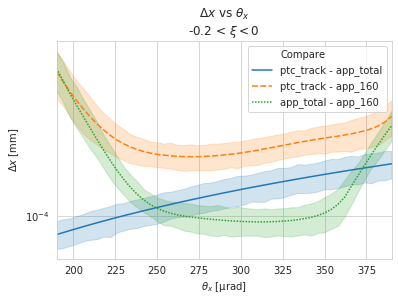

In [131]:
transport.compare(bunch_configuration, transporters, "x", "theta x", title_sufix=r"-0.2 < $\xi < 0$", y_axis_configuration=y_ticks()) #scatterplot don't work!!!

In [96]:
k = transport.compare_heatmap(bunch_configuration, (transporter2, (track_ptg.generate_from_range, track_configuration, track_indexes.ptc_track)), (transporter3, (app_ptg.generate_from_range, approximator, app_indexes.indexes)), "x", "pt") #scatterplot don't work!!!

            x          pt
0   19.234191  287.605578
1   19.681413  287.605578
2   20.168996  287.605578
3   20.629512  287.605578
4   21.091536  287.605578
5   21.554641  287.605578
6   22.021399  287.605578
7   22.524383  287.605578
8   22.940167  287.605578
9   23.421323  287.605578
10  23.864425  287.605578
11  24.349046  287.605578
12  24.815757  287.605578
13  25.280133  287.605578
14  25.745746  287.605578
15  26.212169  287.605578
16  26.696974  287.605578
17  27.156735  287.605578
18  27.647025  287.605578
19  28.110415  287.605578
20  28.572479  287.605578
21  29.049789  287.605578
22  29.532919  287.605578
23  30.020439  287.605578
24  30.507924  287.605578
25  30.939946  287.605578
26  31.437077  287.605578
27  31.900890  287.605578
28  32.380957  287.605578
29  32.892851  287.605578
..        ...         ...
70  52.780322  287.605578
71  53.309508  287.605578
72  53.786111  287.605578
73  54.284702  287.605578
74  54.770852  287.605578
75  55.297133  287.605578
76  55.77111

In [15]:
import importlib
importlib.reload(transport)

<module 'comparators.transport' from '/eos/user/r/rmucha/SWAN_projects/optics_generator_python/src/comparators/transport.py'>

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


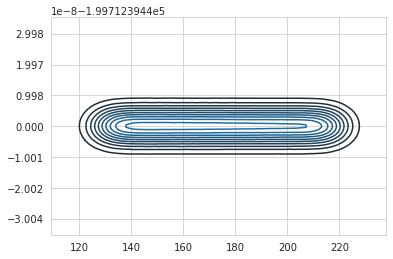

In [16]:
sns.kdeplot(k)